<a href="https://colab.research.google.com/github/aksasaji/Predicting_Life_expectancy_Using_ML/blob/main/Life_Expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plty

In [ ]:
df=pd.read_csv('/content/life_expectancy_data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
print(df.shape)
print(df.columns)

(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
df[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure',
     'Income composition of resources', 'Schooling', 'GDP']] = df[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure',
     'Income composition of resources', 'Schooling', 'GDP']].transform(lambda x: x.fillna(x.median()))

In [ ]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


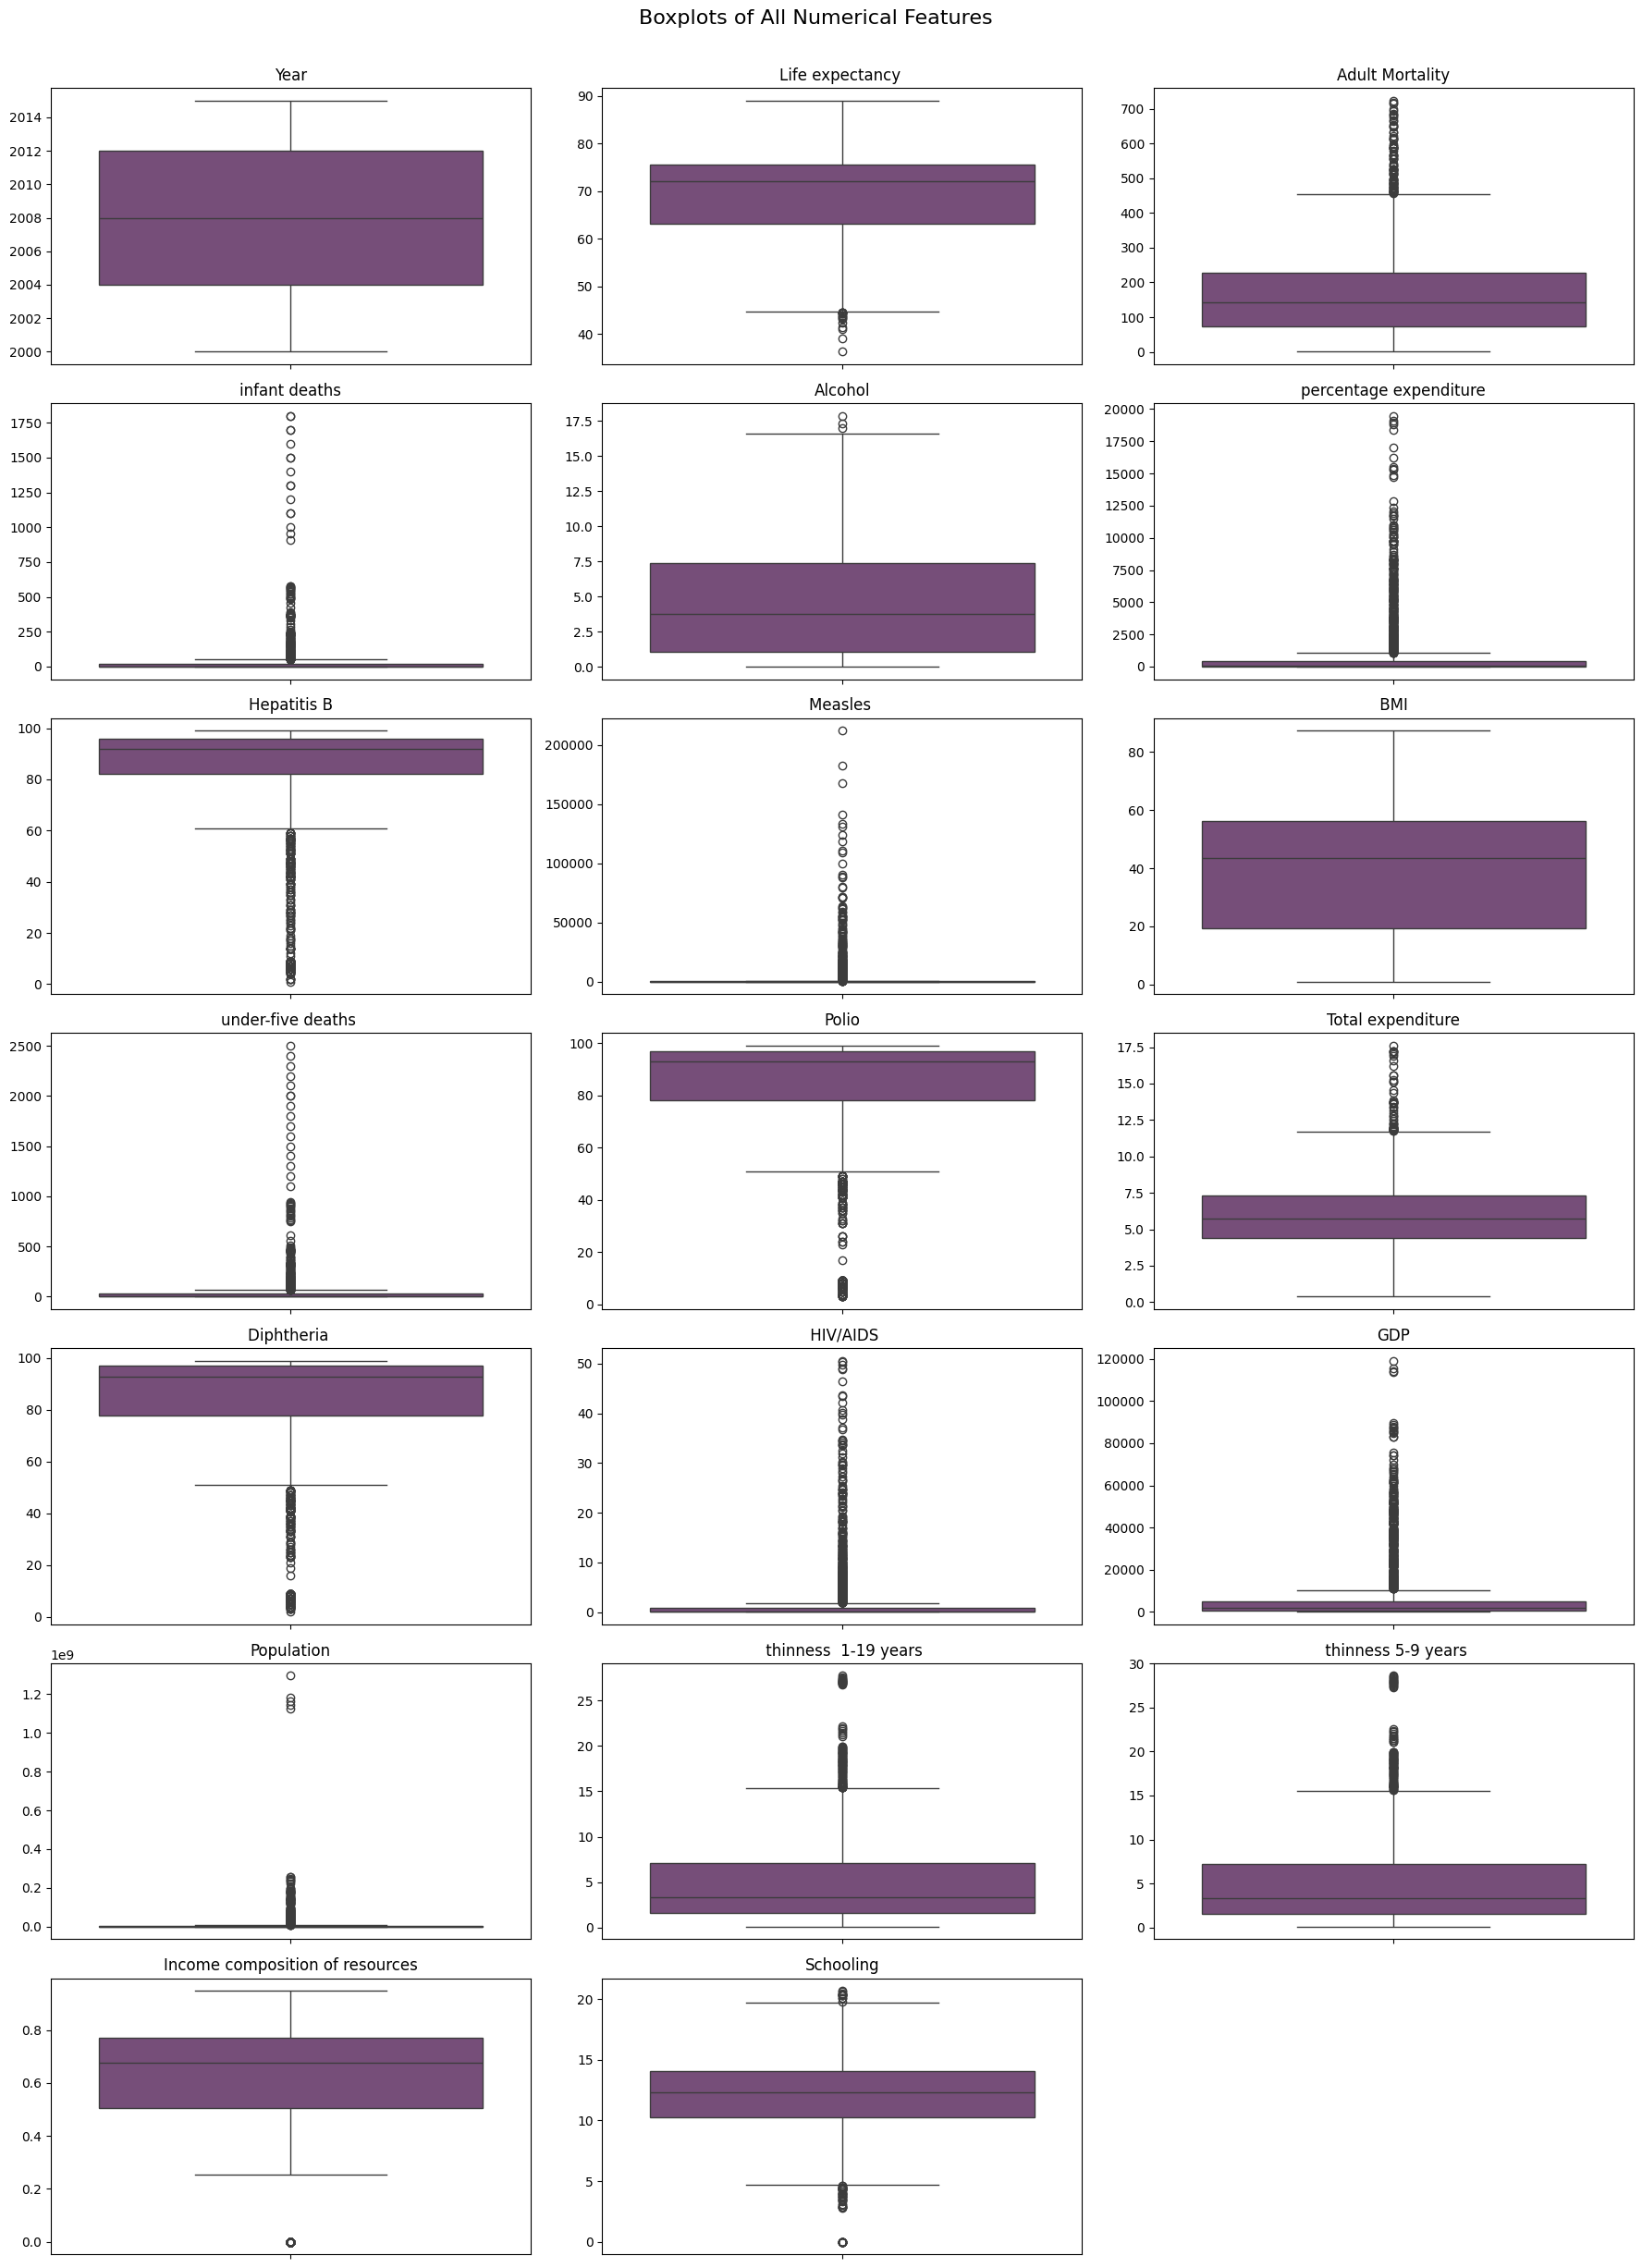

In [ ]:
# Assuming df1 is your cleaned numeric dataframe
df1 = df.select_dtypes(include=['float64', 'int64'])

# Create subplots grid: Adjust rows/cols based on number of features
fig, axs = plty.subplots(ncols=3, nrows=(len(df1.columns) + 2) // 3, figsize=(18, 24))
axs = axs.flatten()

# Loop through each column and create a boxplot
for index, column in enumerate(df1.columns):
    sns.boxplot(y=df1[column], ax=axs[index], color='#7c4780')
    axs[index].set_title(column, fontsize=12)
    axs[index].set_xlabel('')
    axs[index].set_ylabel('')

# Hide unused subplots
for i in range(len(df1.columns), len(axs)):
    fig.delaxes(axs[i])

plty.tight_layout()
plty.suptitle("Boxplots of All Numerical Features", fontsize=16, y=1.02)
plty.show()

In [ ]:
from scipy import stats

# Step 1: Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Step 2: Calculate Z-scores
z_scores = np.abs(stats.zscore(df_numeric))

# Step 3: Define threshold
threshold = 3  # Common threshold for Z-score

# Step 4: Filter rows (keep only non-outliers across all columns)
df2 = df[(z_scores < threshold).all(axis=1)]

# Step 5: Check how many rows were removed
print(f"Original shape: {df.shape}")
print(f"After outlier removal: {df2.shape}")


Original shape: (2938, 22)
After outlier removal: (2177, 22)


<Axes: >

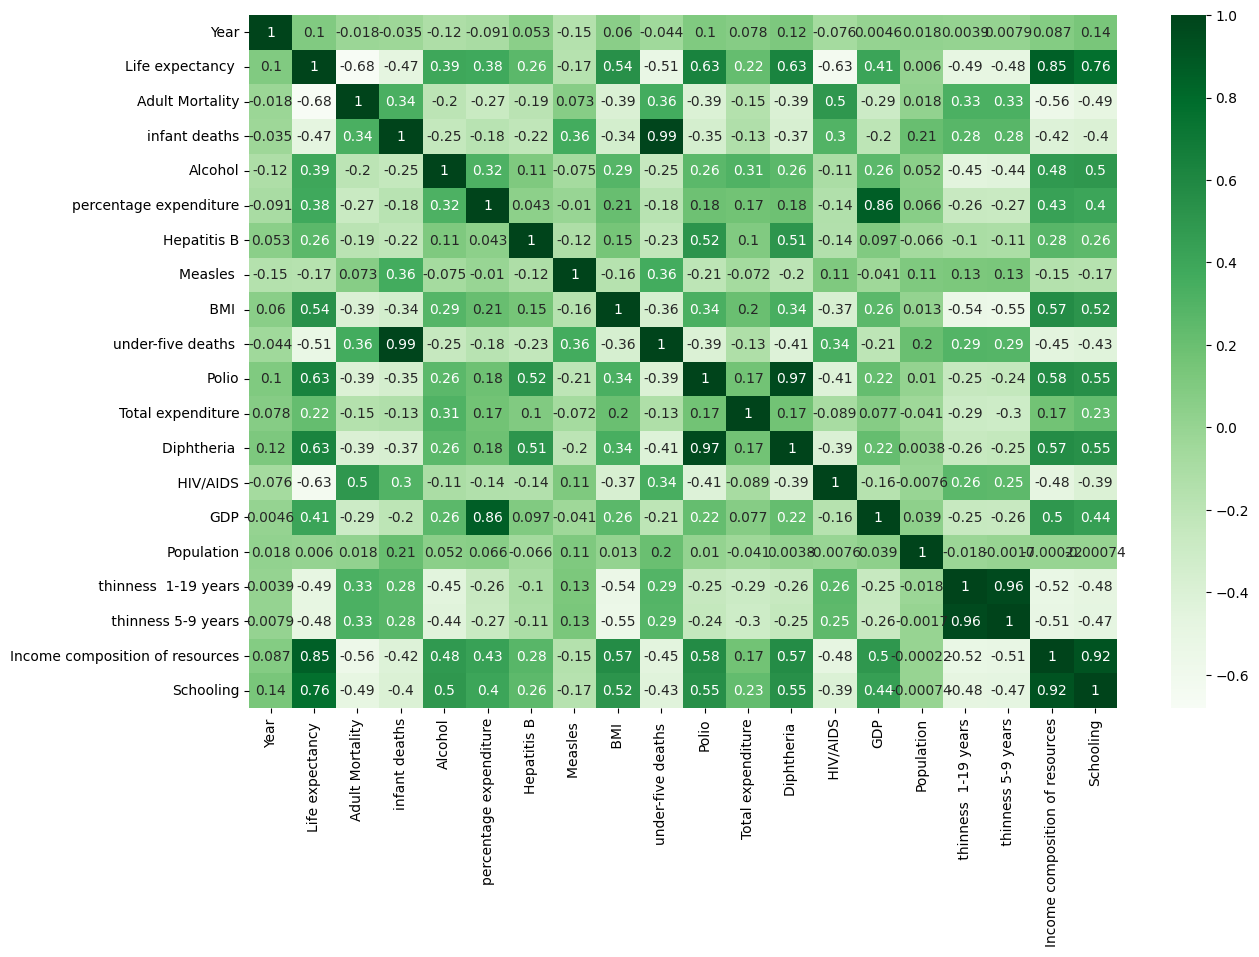

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df2.select_dtypes(include='number')
plty.ion()
fig, ax = plty.subplots(figsize=(14, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', ax=ax)

<Axes: title={'center': 'Average Life Expectancy'}, xlabel='Status', ylabel='Life Expectancy'>

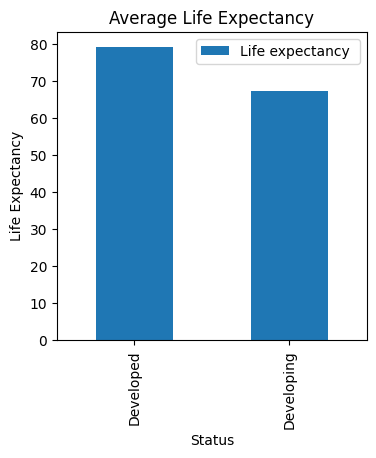

In [ ]:
import plotly.express as plt
data_1 = df.groupby(['Status'])[['Life expectancy ']].mean()
data_1.plot(kind='bar', title='Average Life Expectancy', ylabel='Life Expectancy', xlabel='Status', figsize=(4, 4))

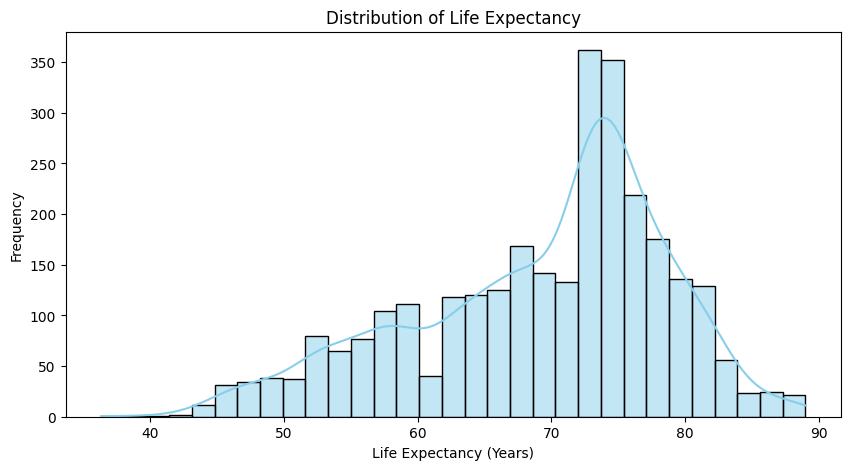

In [ ]:
plty.figure(figsize=(10, 5))
sns.histplot(df['Life expectancy '], kde=True, color='skyblue')
plty.title('Distribution of Life Expectancy')
plty.xlabel('Life Expectancy (Years)')
plty.ylabel('Frequency')
plty.show()

In [ ]:
india = df.loc[df['Country'] == "India"]
india

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,3.755,0.000000,87.0,90387,...,86.0,5.755,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.070,86.521539,79.0,79563,...,84.0,4.690,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.110,67.672304,7.0,13822,...,82.0,4.530,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.100,64.969645,73.0,18668,...,79.0,4.390,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.000,64.605901,44.0,33634,...,79.0,4.330,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.770,57.733599,38.0,31458,...,76.0,4.280,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.500,0.844186,37.0,56188,...,73.0,4.380,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.930,43.030433,29.0,44258,...,69.0,4.340,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.590,5.234770,6.0,41144,...,67.0,4.230,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.370,34.859427,6.0,64185,...,66.0,4.250,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


<Axes: xlabel='GDP', ylabel='Life expectancy '>

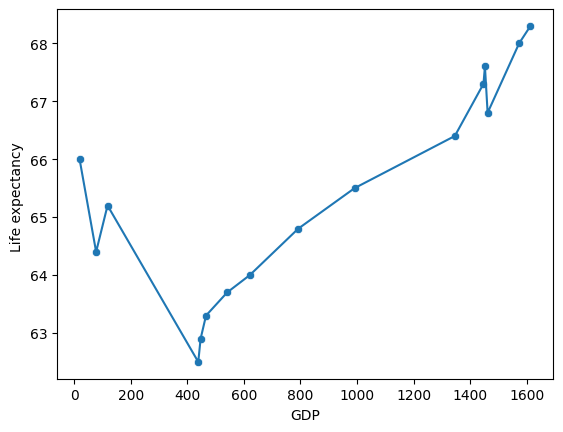

In [ ]:
sns.scatterplot(x=india["GDP"],y=india["Life expectancy "])
sns.lineplot(x=india["GDP"],y=india["Life expectancy "])

<Axes: xlabel='Year', ylabel='Life expectancy '>

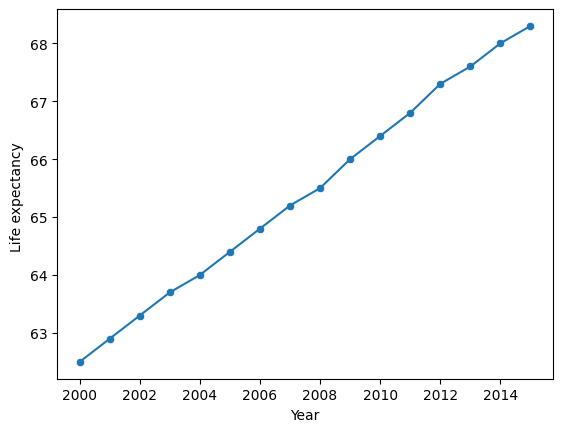

In [ ]:
sns.scatterplot(x=india["Year"],y=india["Life expectancy "])
sns.lineplot(x=india["Year"],y=india["Life expectancy "])

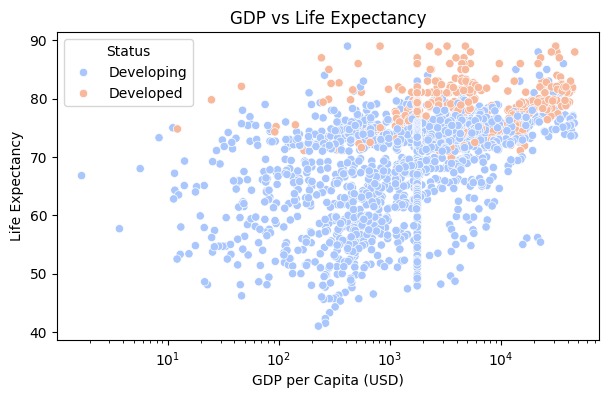

In [ ]:
plty.figure(figsize=(7, 4))
sns.scatterplot(data=df2, x='GDP', y='Life expectancy ', hue='Status', palette='coolwarm')
plty.title('GDP vs Life Expectancy')
plty.xlabel('GDP per Capita (USD)')
plty.ylabel('Life Expectancy')
plty.xscale('log')  # Optional: for better visibility
plty.show()

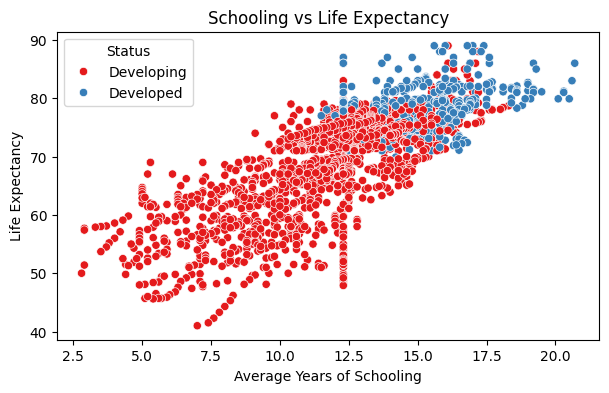

In [ ]:
plty.figure(figsize=(7, 4))
sns.scatterplot(data=df2, x='Schooling', y='Life expectancy ', hue='Status', palette='Set1')
plty.title('Schooling vs Life Expectancy')
plty.xlabel('Average Years of Schooling')
plty.ylabel('Life Expectancy')
plty.show()

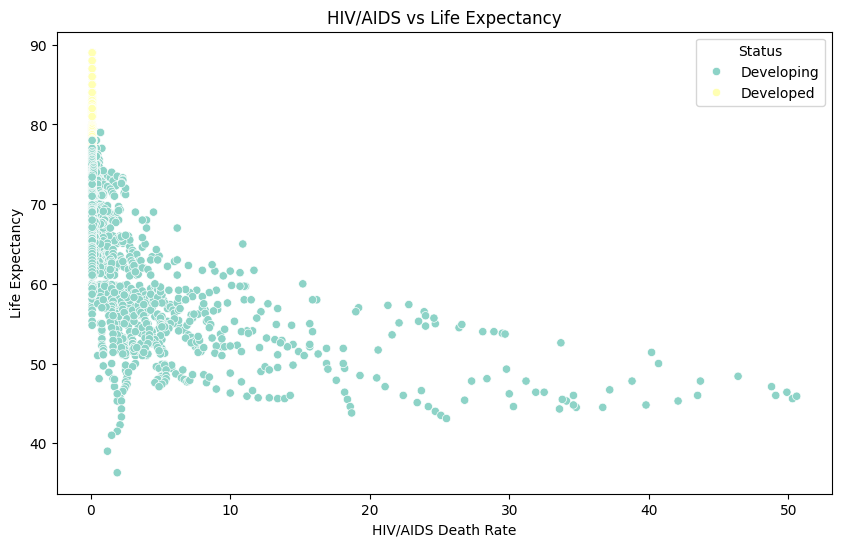

In [ ]:
plty.figure(figsize=(10, 6))
sns.scatterplot(x=' HIV/AIDS', y='Life expectancy ', hue='Status', data=df, palette='Set3')
plty.title('HIV/AIDS vs Life Expectancy')
plty.xlabel('HIV/AIDS Death Rate')
plty.ylabel('Life Expectancy')
plty.show()

<ipython-input-26-a03e5889182d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df2, x='Year', y='Life expectancy ', hue='Status', estimator='mean', ci=None)


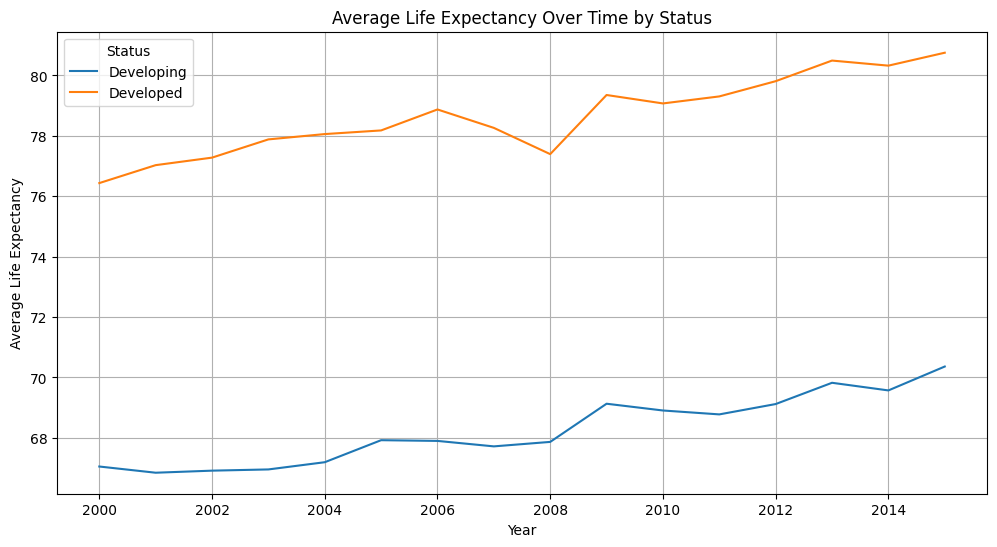

In [ ]:
plty.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Year', y='Life expectancy ', hue='Status', estimator='mean', ci=None)
plty.title('Average Life Expectancy Over Time by Status')
plty.xlabel('Year')
plty.ylabel('Average Life Expectancy')
plty.grid(True)
plty.show()

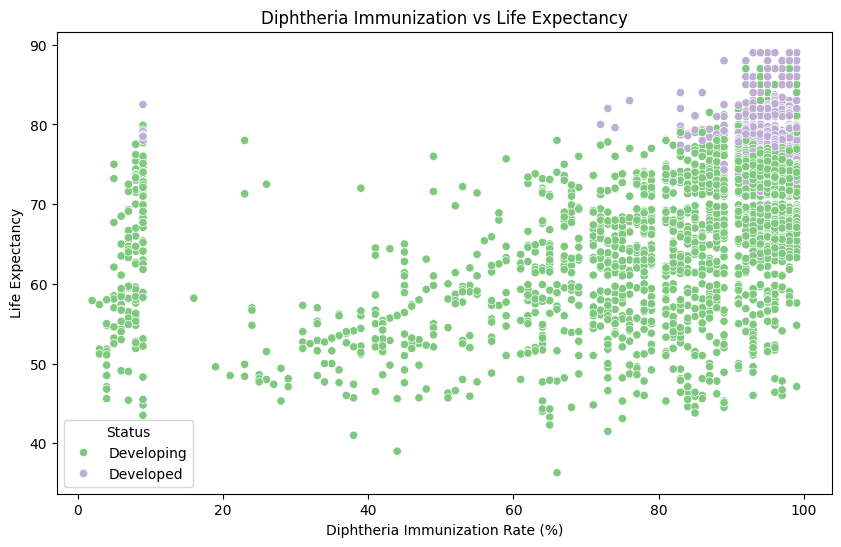

In [ ]:
plty.figure(figsize=(10, 6))
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', hue='Status', data=df, palette='Accent')
plty.title('Diphtheria Immunization vs Life Expectancy')
plty.xlabel('Diphtheria Immunization Rate (%)')
plty.ylabel('Life Expectancy')
plty.show()

<ipython-input-28-4f2c9558eb15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_life.head(10), y=avg_life.head(10).index, palette='Reds_r')


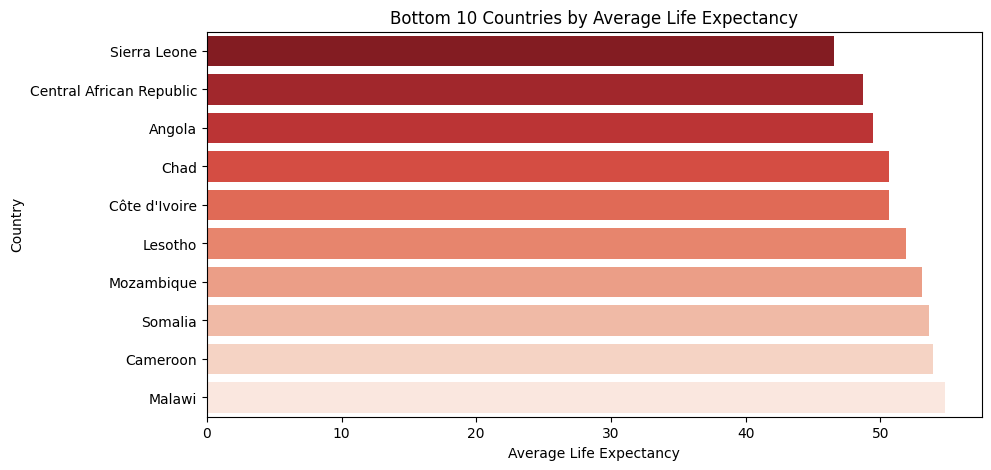

<ipython-input-28-4f2c9558eb15>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_life.tail(10), y=avg_life.tail(10).index, palette='Greens')


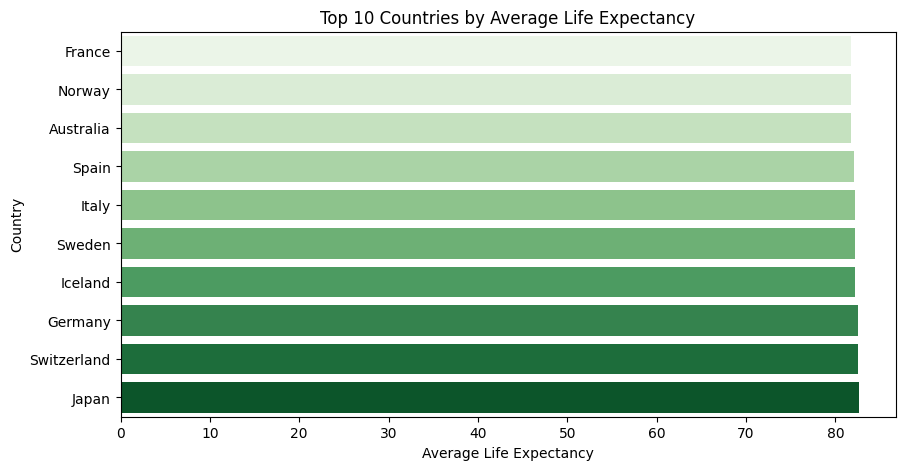

In [ ]:
avg_life = df2.groupby('Country')['Life expectancy '].mean().sort_values()

# Bottom 10 countries
plty.figure(figsize=(10, 5))
sns.barplot(x=avg_life.head(10), y=avg_life.head(10).index, palette='Reds_r')
plty.title('Bottom 10 Countries by Average Life Expectancy')
plty.xlabel('Average Life Expectancy')
plty.show()

# Top 10 countries
plty.figure(figsize=(10, 5))
sns.barplot(x=avg_life.tail(10), y=avg_life.tail(10).index, palette='Greens')
plty.title('Top 10 Countries by Average Life Expectancy')
plty.xlabel('Average Life Expectancy')
plty.show()

<ipython-input-29-a39a8d9437d5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Status', y='Schooling', data=df2, estimator='mean', ci='sd', palette='Blues')
<ipython-input-29-a39a8d9437d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Schooling', data=df2, estimator='mean', ci='sd', palette='Blues')


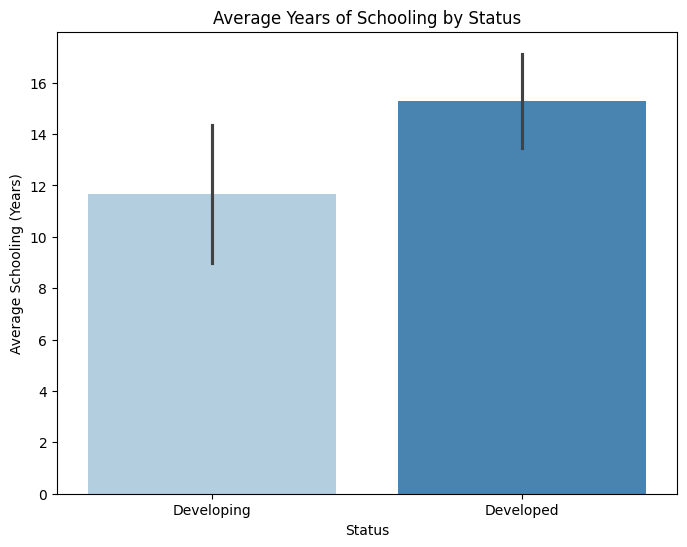

In [ ]:
plty.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Schooling', data=df2, estimator='mean', ci='sd', palette='Blues')
plty.title('Average Years of Schooling by Status')
plty.ylabel('Average Schooling (Years)')
plty.show()

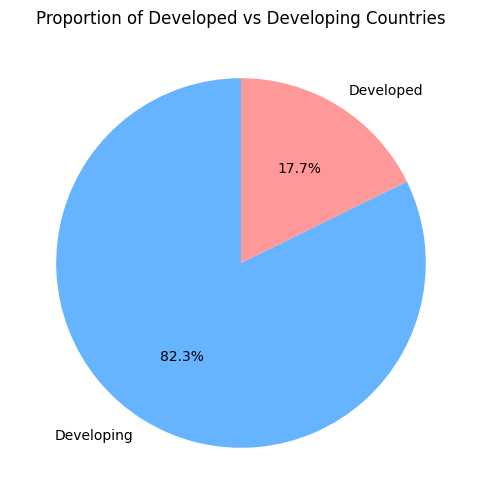

In [ ]:
plty.figure(figsize=(6, 6))
status_counts = df2['Status'].value_counts()
plty.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plty.title('Proportion of Developed vs Developing Countries')
plty.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical columns
le = LabelEncoder()
df2['Country_encoded'] = le.fit_transform(df2['Country'])
df2['Status_encoded'] = le.fit_transform(df2['Status'])
# Prepare features and target
X = df2.drop(columns=['Country', 'Status', 'Life expectancy '])  # Features
y = df2['Life expectancy ']                                       # Target
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict on test set
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using NumPy
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")


Linear Regression RMSE: 3.41
Linear Regression R² Score: 0.83


<ipython-input-31-7071b9f52fd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Country_encoded'] = le.fit_transform(df2['Country'])
<ipython-input-31-7071b9f52fd4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Status_encoded'] = le.fit_transform(df2['Status'])


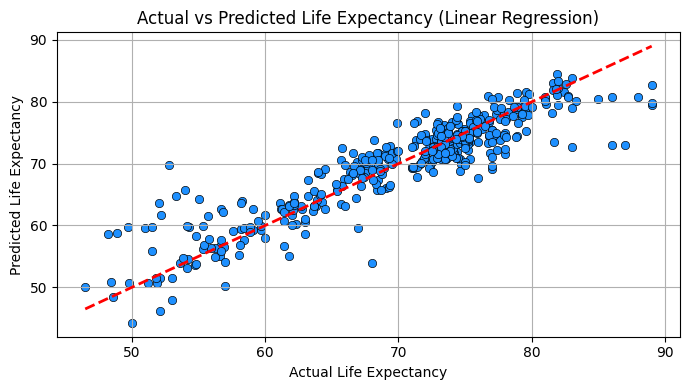

In [ ]:
plty.figure(figsize=(7, 4))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='black')
plty.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Reference line
plty.xlabel("Actual Life Expectancy")
plty.ylabel("Predicted Life Expectancy")
plty.title("Actual vs Predicted Life Expectancy (Linear Regression)")
plty.grid(True)
plty.tight_layout()
plty.show()

Accuracy: 0.9724770642201835

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        70
           1       0.98      0.98      0.98       366

    accuracy                           0.97       436
   macro avg       0.95      0.95      0.95       436
weighted avg       0.97      0.97      0.97       436



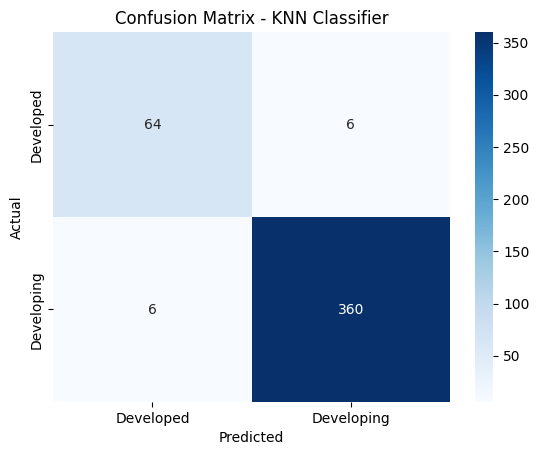

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Step 1: Encode categorical variables
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Status_encoded'] = le.fit_transform(df['Status'])  # Target: 0 = Developed, 1 = Developing
# Step 2: Feature and target selection
X = df2.drop(columns=['Country', 'Status', 'Life expectancy ', 'Status_encoded'])  # Features
y = df2['Status_encoded']  # Target
# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Step 5: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Step 6: Predict and Evaluate
y_pred = knn.predict(X_test)
# Step 7: Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Developed', 'Developing'],
            yticklabels=['Developed', 'Developing'])
plty.xlabel('Predicted')
plty.ylabel('Actual')
plty.title('Confusion Matrix - KNN Classifier')
plty.show()

Logistic Regression Accuracy: 0.9335

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        70
           1       0.95      0.97      0.96       366

    accuracy                           0.93       436
   macro avg       0.89      0.86      0.87       436
weighted avg       0.93      0.93      0.93       436



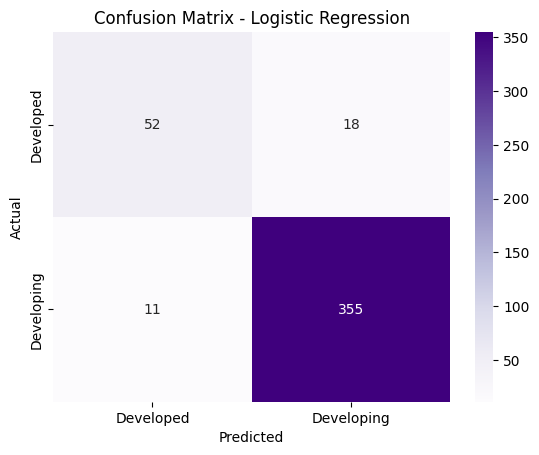

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
# Prepare features and target
X = df2.drop(columns=['Country', 'Status', 'Life expectancy ', 'Status_encoded'])  # Input features
y = df2['Status_encoded']  # Target: 0 = Developed, 1 = Developing
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
# Make predictions
y_pred = log_reg.predict(X_test)
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Developed', 'Developing'],
            yticklabels=['Developed', 'Developing'])
plty.title("Confusion Matrix - Logistic Regression")
plty.xlabel("Predicted")
plty.ylabel("Actual")
plty.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
#Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       #'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       #'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       #'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       #' thinness  1-19 years', ' thinness 5-9 years',
       #'Income composition of resources', 'Schooling'],
      #dtype='object')
# --- Step 1: Sample input data ---
# Input one country's data (replace with actual values)
sample_input = pd.DataFrame({
    'Year': [2015],
    'Adult_Mortality': [180],
    'Infant_deaths': [4],
    'Alcohol': [4.5],
    'Percentage_expenditure': [125.0],
    'Hepatitis_B': [93],
    'Measles': [0],
    'BMI': [21.4],
    'Under_five_deaths': [5],
    'Polio': [95],
    'Total_expenditure': [6.3],
    'Diphtheria': [95],
    'HIV/AIDS': [0.1],
    'GDP': [5000],
    'Population': [30000000],
    'thinness_1-19_years': [3.5],
    'thinness_5-9_years': [2.8],
    'Income_composition_of_resources': [0.65],
    'Schooling': [11],
    'Country_encoded': [42],   # Example encoding
    'Status_encoded': [1]      # 1 = Developing, 0 = Developed
})

# --- Step 2: Load scaler and model (assuming you've saved them previously) ---
# If you've saved them using joblib or pickle earlier:
# scaler = joblib.load('scaler.pkl')
# model = joblib.load('life_expectancy_model.pkl')

# For demonstration, if model and scaler are in memory:
# Fit dummy scaler just to make this self-contained:
scaler = StandardScaler()
X_all = df.drop(columns=['Country', 'Status', 'Life_expectancy'])  # Assumes df exists
scaler.fit(X_all)

# Train the model (if not already trained)
model = RandomForestRegressor()
y_all = df['Life_expectancy']
X_scaled_all = scaler.transform(X_all)
model.fit(X_scaled_all, y_all)

# --- Step 3: Scale input and make prediction ---
sample_input_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_input_scaled)

# --- Step 4: Output result ---
print("✅ Predicted Life Expectancy:", round(prediction[0], 2), "years")